In [2]:
import torch
import torch.nn.functional as F
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = load_wine()
#print(data.DESCR)

### Dataset

In [4]:
target = F.one_hot(torch.tensor(data.target, dtype=torch.int64), num_classes=3).float()
features = torch.tensor(data.data, dtype=torch.float32)
train = torch.utils.data.TensorDataset(features, target)
#X, y = next(iter(train))

### Training CPU

In [8]:
n_epochs = 1000
n_features = features.shape[1]
n_labels = 3
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


train_loader = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

model = torch.nn.Sequential(
    torch.nn.Linear(n_features, 8),
    torch.nn.ReLU(),
    torch.nn.Linear(8, n_labels),
    torch.nn.Softmax(dim=1)
).to(device)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

history = {'loss':[]}
for epoch in range(n_epochs):
    for ib, data in enumerate(train_loader):
        X, y = data
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #if ib % 3 == 0:
        #    #loss, current = loss.item(), (id_batch + 1)* len(x_batch)
    history['loss'].append(loss.item())
            
            #print(f"loss: {loss:>7f}  [{current:>5d}/{dataset_size:>5d}]")
        

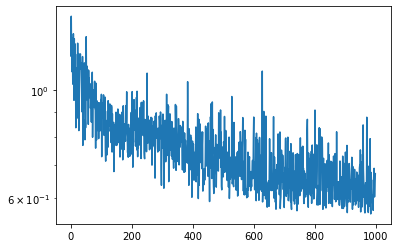

In [9]:
plt.semilogy(history['loss'])

### For the future

In [101]:
df = pd.DataFrame({"data":list(data.data), "labels":data.target})
df.to_pickle('./torch_data/df.pkl')
#df.head()

In [ ]:
tor

In [56]:
#X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=42)
#df_train = pd.DataFrame({"data":list(X_train), "labels":y_train})
#df_test = pd.DataFrame({"data":list(X_test), "labels":y_test})
#df_train.to_pickle('./torch_data/train_batch.pkl')
#df_test.to_pickle('./torch_data/test_batch.pkl')

In [85]:
#data.label0 = data.data[data.target == 0]
#data.label1 = data.data[data.target == 1]
#data.label2 = data.data[data.target == 2]
#len(data.label0), len(data.label1), len(data.label2), len(data.data)

In [78]:
#df_label0 = pd.DataFrame({"data":list(data.label0), "labels":np.ones(len(data.label0))*0 + 0})
#df_label1 = pd.DataFrame({"data":list(data.label1), "labels":np.ones(len(data.label1))*0 + 1})
#df_label2 = pd.DataFrame({"data":list(data.label2), "labels":np.ones(len(data.label2))*0 + 2})

In [84]:
#df_label0.to_pickle('./torch_data/id-0.pkl')
#df_label1.to_pickle('./torch_data/id-1.pkl')
#df_label2.to_pickle('./torch_data/id-2.pkl')

### Create Dataset

In [ ]:
train = data_utils.TensorDataset(features, target)
train_loader = data_utils.DataLoader(train, batch_size=10, shuffle=True)

In [ ]:
class MyDataset(Dataset):
 
  def __init__(self, ):
    #df=pd.read_csv(file_name)
 
    X=price_df.iloc[:,0:8].values
    y=price_df.iloc[:,8].values
 
    self.X=torch.tensor(X,dtype=torch.float32)
    self.y=torch.tensor(y,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_train)
   
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

### For the future

read: https://github.com/shervinea/pytorch-data-generator/blob/master/pytorch_script.py

In [86]:
# class Dataset(torch.utils.data.Dataset):
#     #'Characterizes a dataset for PyTorch'
#     def __init__(self, list_IDs) -> None:
#         'Initialization'
#         super().__init__()
#         self.list_IDs = list_IDs# [fname]
                
#     def __len__(self):
#         'Denotes the total number of samples'
#         return len(self.list_IDs)
    
#     def __getitem__(self, index):
#         'Generates one sample of data'
#         # Select sample
#         fname = self.list_IDs[index]
        
#         # Load data and get label
#         data = torch.load('torch_data/' + fname + '.pkl')
#         X = data.data
#         y = data.labels
        
#         return X, y

In [87]:
# # Datasets
# data = {'train': ['id-1', 'id-2', 'id-3']} # IDs
# labels = {'id-1': 0, 'id-2': 1, 'id-3': 2} # Labels

In [91]:
# X = torch.load('torch_data/' + ID + '.pkl')

In [90]:
# # CUDA for PyTorch
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# cudnn.benchmark = True

# # Parameters
# params = {'batch_size': 1, 'shuffle': True, 'num_workers': 6}
# max_epochs = 100

# # Datasets
# partition = {'train': ['id-1', 'id-2', 'id-3'], 'validation': ['id-4']} # IDs
# labels = {'id-1': 0, 'id-2': 1, 'id-3': 2, 'id-4': 1} # Labels

# # Generators
# training_set = Dataset(partition['train'], labels)
# training_generator = data.DataLoader(training_set, **params)

# validation_set = Dataset(partition['validation'], labels)
# validation_generator = data.DataLoader(validation_set, **params)

In [92]:
# # Loop over epochs
# for epoch in range(max_epochs):
#     # Training
#     for local_batch, local_labels in training_generator:
#         # Transfer to GPU
#         local_batch, local_labels = local_batch.to(device), local_labels.to(device)

#         # Model computations
#         [...]

#     # Validation
#     with torch.set_grad_enabled(False):
#         for local_batch, local_labels in validation_generator:
#             # Transfer to GPU
#             local_batch, local_labels = local_batch.to(device), local_labels.to(device)

#             # Model computations
#             [...]